<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

🔹 **Задание 1. Первичный анализ данных**

1. Загрузите файл в датафрейм и выведите первые 5 строк (Подсказка: найти в документации pandas, как читать csv файл, выставить разделителем запятую).
2. Первый столбец - индекс, который перезаписался как отдельный столбец: удалите его
3. Определите и выведите:

* количество строк и столбцов

* типы данных

* общую информацию по таблице и краткую статистику по числовым столбцам

* минимальное и максимальное значение по мировым сборам

* уникальные жанры

* количество фильмов по каждому рейтингу

In [3]:
data = pd.read_csv('movies.csv', sep=',')

In [4]:
df = pd.DataFrame(data)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [5]:
df.shape

(918, 10)

In [6]:
df.dtypes

Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [7]:
df.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,9.180000e+02,9.180000e+02,9.180000e+02
mean,1.677469e+08,2.301434e+08,3.968668e+08
std,1.040360e+08,2.176011e+08,3.082629e+08
min,8.036084e+07,2.600000e+02,8.160000e+07
25%,1.016071e+08,8.845620e+07,2.005564e+08
50%,1.321351e+08,1.638819e+08,3.019416e+08
75%,1.913905e+08,2.885577e+08,4.750718e+08
max,9.366622e+08,2.086739e+09,2.847246e+09


In [8]:
df["World Sales (in $)"].min()

81600000

In [9]:
df["World Sales (in $)"].max()

2847246203

In [10]:
df["Distributor"].unique()

array(['Walt Disney Studios Motion Pictures', 'Twentieth Century Fox',
       'Sony Pictures Entertainment (SPE)', 'Paramount Pictures',
       'Universal Pictures', 'Warner Bros.', 'DreamWorks Distribution',
       'Lionsgate', 'DreamWorks', 'New Line Cinema', 'Newmarket Films',
       'Summit Entertainment', 'Columbia Pictures', 'IFC Films',
       'TriStar Pictures', 'Orion Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Miramax', 'The Weinstein Company', 'Fox Searchlight Pictures',
       'Revolution Studios', 'Artisan Entertainment',
       'Sony Pictures Classics', 'United Artists', 'Screen Gems',
       'USA Films', '20th Century Studios', 'STX Entertainment',
       'Dimension Films', 'United Artists Releasing', 'FilmDistrict',
       'Focus Features', 'Relativity Media', 'Roadside Attractions'],
      dtype=object)

In [11]:
df["License"].value_counts()

License
PG-13    363
R        194
PG       173
G         14
Name: count, dtype: int64

🔹 **Задание 2. Обработка пропусков и создание новых признаков**

1. Проверьте, в каких столбцах есть пропуски.
2. Замените пропуски в столбце с рейтингом на самое частотное значение (Подсказка: заменить на mode()[0]).
3. Удалите все строки с пропусками в дате релиза.
3. Добавьте новый столбец: доля домашних сборов относительно мировых.

In [12]:
df.isna().sum()

Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [13]:
df["License"] = df["License"].fillna(df["License"].mode()[0])
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,PG-13
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,PG-13


In [14]:
df = df.dropna().reset_index(drop=True)
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13


In [15]:
df["Domestic sales share"] = df["Domestic Sales (in $)"]/df["World Sales (in $)"]
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529


🔹 **Задание 3. Работа с датами**

1. Преобразуйте столбец Release Date в тип datetime (Подсказка: найти в документации pandas, как вызывать функцию to_datetime).
2. Добавьте новый столбец Year, извлекая из даты только год (Подсказка: найти в документации pandas, как вызывать функцию dt.year).

In [16]:
df["Release Date"]=pd.to_datetime(df["Release Date"])
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529


In [17]:
df["Year"]=df["Release Date"].dt.year
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share,Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103,2009
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487,1997
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529,2015


🔹 **Задание 4. Фильтрация данных и срезы**

1. Найдите и выведите фильмы с 10 по 20 строку:

* с домашними сборами больше 70 миллионов (только столбцы с названиями фильмов и домашними сборами)

* со мстителями (в названии есть "Avengers") (только столбцы с названиями фильмов и описанием)

* 20-ого века и студии Paramount Pictures (только столбцы с названиями фильмов, годом и студией)

2. Отсортируйте и пересохраните таблицу в порядке убывания мировых сборов.

In [18]:
df[df["Domestic Sales (in $)"] > 70000000]

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share,Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103,2009
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487,1997
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
795,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,2004-06-25,81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,0.687533,2004
796,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,2001-12-21,80936232,22056304,102992536,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,PG-13,0.785846,2001
797,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),2010-08-13,80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,0.393824,2010
798,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,2003-10-17,80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,0.750454,2003


In [19]:
df[df["Title"].str.contains("Avengers")]

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share,Year
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836,2019
5,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,2012-04-25,623357910,895457605,1518815515,"['Action', 'Adventure', 'Sci-Fi']",2 hr 23 min,PG-13,0.410424,2012
15,Avengers: Age of Ultron (2015),When Tony Stark and Bruce Banner try to jump-s...,Walt Disney Studios Motion Pictures,2015-04-22,459005868,943803672,1402809540,"['Action', 'Adventure', 'Sci-Fi']",2 hr 21 min,PG-13,0.327205,2015


In [20]:
df.loc[df["Year"].between(1900,1999) & (df["Distributor"] == "Paramount Pictures"), ["Title", "Distributor", "Release Date"]]

,Title,Distributor,Release Date
3,Titanic (1997),Paramount Pictures,1997-12-19
59,Forrest Gump (1994),Paramount Pictures,1994-07-06
118,Indiana Jones and the Raiders of the Lost Ark ...,Paramount Pictures,1981-06-12
155,Ghost (1990),Paramount Pictures,1990-07-13
198,Indiana Jones and the Last Crusade (1989),Paramount Pictures,1989-05-24
208,Grease (1978),Paramount Pictures,1978-06-16
229,Mission: Impossible (1996),Paramount Pictures,1996-05-22
234,Indiana Jones and the Temple of Doom (1984),Paramount Pictures,1984-05-23
323,Runaway Bride (1999),Paramount Pictures,1999-07-30
392,The Godfather (1972),Paramount Pictures,1972-03-15


In [21]:
df.sort_values(["World Sales (in $)"], ascending=False).head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share,Year
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103,2009
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836,2019
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487,1997
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598,2015
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529,2015


🔹 **Задание 5. Группировка, агрегация и визуализация**

1. Создайте таблицу с группировкой: сколько фильмов вышло в каждом году.
2. Постройте график по этим данным с:
* подписями осей
* названием графика
* сеткой

3. Создайте таблицу с двойной группировкой: сколько суммарно общемировых сборов собрала каждая студия, сколько фильмов каждая студия сняла.
4. Постройте сабплоты: две столбчатые диаграммы друг под другом по этим данным с:
* размером фигуры 12 * 12
* подписями осей
* названием графика
* цветовой палитрой
* повернутыми на 90 градусов лейблами на оси X
* перед выводом графика добавьте plt.tight_layot(), чтобы графики не накладывались друг на друга

In [22]:
agg_films = (df.groupby("Year")
                 .agg(films_number=("Title", "count"))
            .reset_index()
            )

In [23]:
agg_films

,Year,films_number
0,1972,1
1,1975,1
2,1977,1
3,1978,2
4,1979,2
5,1980,1
6,1981,2
7,1982,2
8,1983,2
9,1984,2


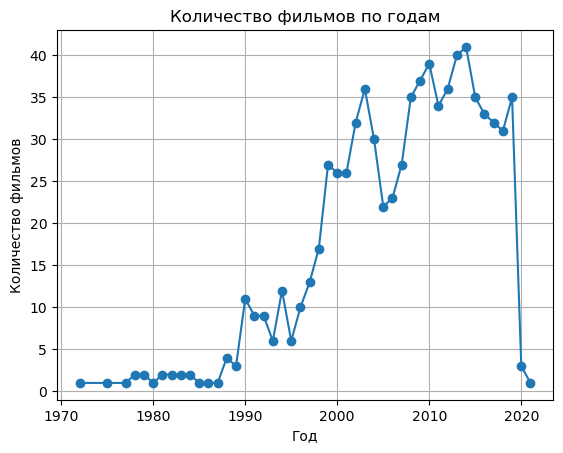

In [24]:
plt.figure()
plt.plot(agg_films["Year"],
         agg_films["films_number"],
         marker="o")
plt.title("Количество фильмов по годам")
plt.xlabel("Год")
plt.ylabel("Количество фильмов")
plt.grid(True) 
plt.show()

In [25]:
# Создайте таблицу с двойной группировкой: сколько суммарно общемировых 
# сборов собрала каждая студия, сколько фильмов каждая студия сняла.
agg_studios = (df.groupby("Distributor")
               .agg(sum_sales=("World Sales (in $)", "sum"), count_films=("Title", "count"))
               .reset_index())
agg_studios

,Distributor,sum_sales,count_films
0,Artisan Entertainment,248639099,1
1,Columbia Pictures,1288912626,6
2,Dimension Films,1223005113,7
3,DreamWorks,9917749677,19
4,DreamWorks Distribution,5272576107,16
5,FilmDistrict,332189519,2
6,Focus Features,415922809,2
7,Fox Searchlight Pictures,940181269,3
8,IFC Films,368744044,1
9,Lionsgate,6930240507,16


C:\Users\brend\AppData\Local\Temp\ipykernel_8200\3147956638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_studios, x="Distributor", y="sum_sales", palette="Blues_d")
C:\Users\brend\AppData\Local\Temp\ipykernel_8200\3147956638.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_studios, x="Distributor", y="count_films", palette="Reds_d")


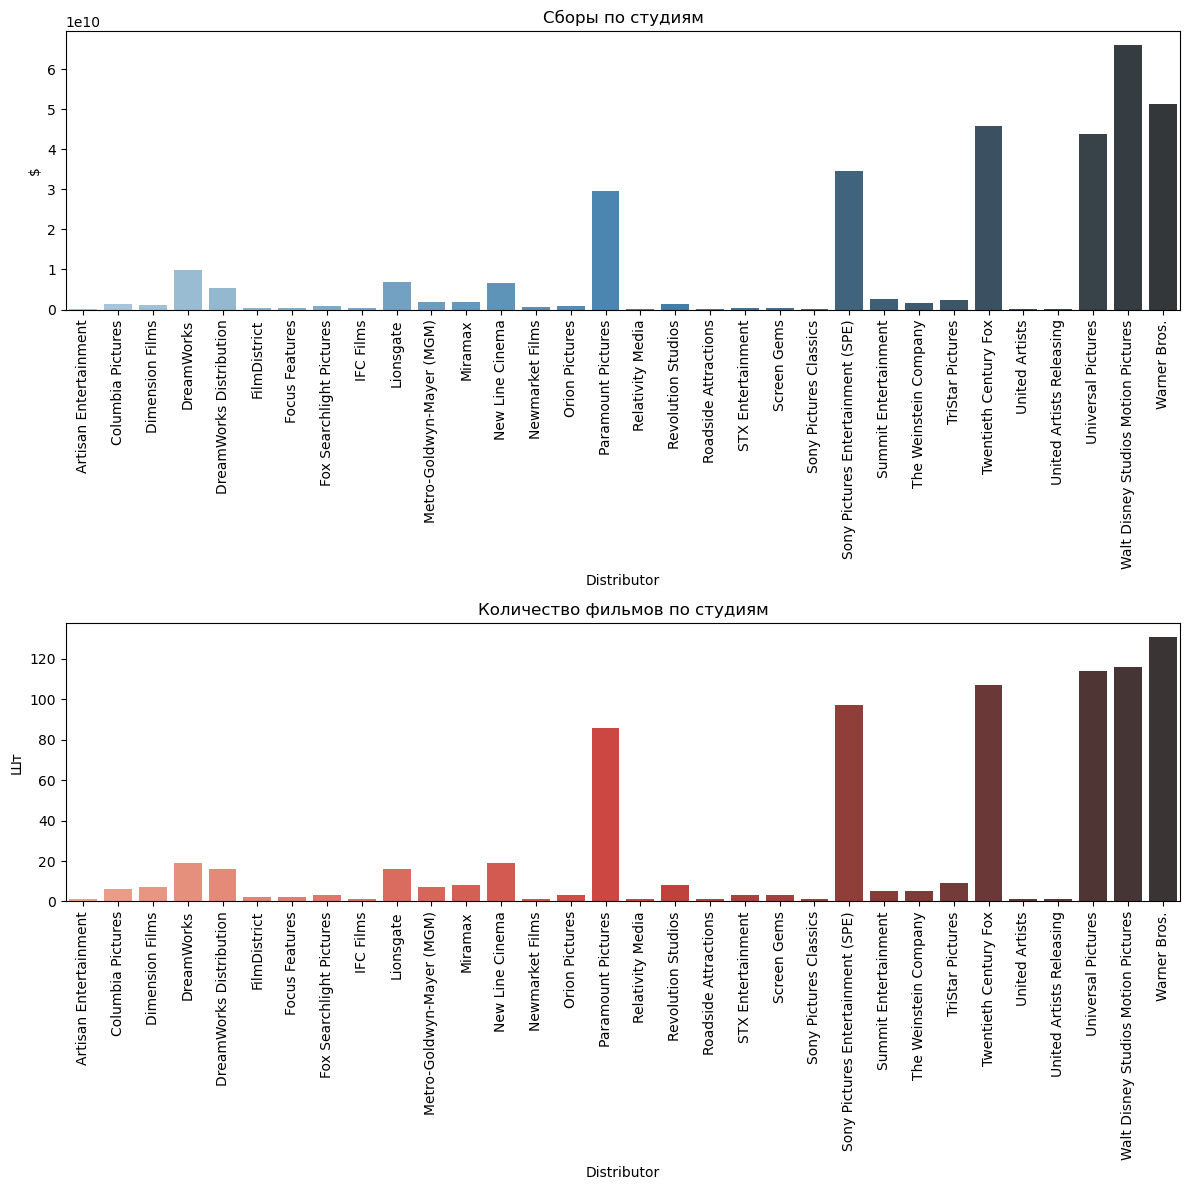

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data=agg_studios, x="Distributor", y="sum_sales", palette="Blues_d")
plt.title("Сборы по студиям")
plt.ylabel("$")
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(data=agg_studios, x="Distributor", y="count_films", palette="Reds_d")
plt.title("Количество фильмов по студиям")
plt.ylabel("Шт")
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

🔹 **Задание 6. Кастомные функции и применение apply()**

1. Напишите функцию movie_runtime_minutes, которая переведет длительность фильмов из текстового формата в минуты:
* как один из вариантов, можно найти оба числа, то есть часы и минуты, с помощью re.findall("[0-9]{1, }", x), не забыв импортировать библиотеку re
* сохранить это как список, затем умножить первое число (час) из списка на 60, прибавить второе число (минуты): не забыть учесть, что не во всех фильмах указаны минуты - значит, нужно прописать отдельные условия, если есть и часы, и минуты, или есть только часы
* не забыть, что элементы в списке - строковые, нужно перевести их в числа: условно будет int(numbers[0])*60 + ...
2. Примените функцию к таблице, создав новый столбец Movie Runtime Minutes.

In [27]:
def movie_runtime_minutes(x):
    lst = re.findall(r"[0-9]{1,}", x['Movie Runtime'])
    if len(lst)>1:
        minutes = int(lst[0])*60 + int(lst[1])
    elif len(lst)==1:
        minutes = int(lst[0])
    else:
        minutes = 0
    return minutes
df["movie_runtime_minutes"] = df.apply(movie_runtime_minutes, axis=1)
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Domestic sales share,Year,movie_runtime_minutes
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,0.452598,2015,138
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,0.306836,2019,181
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,0.267103,2009,162
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,0.299487,1997,194
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,0.390529,2015,124


🔹 **Задание 7. Визуализация корреляций**

1. Выведите корреляционную матрицу по числовым признакам в таблице.
2. Постройте тепловую карту по этим данным с названием графика.
3. Напишите в отдельной ячейке markdown, есть ли взаимосвязь между продолжительностью фильма и его сборами?
4. Постройте диаграмму рассеяния между признаками, у которых наибольшая корреляция (Подсказка: в документации найдите matplotlib scatter, какие обязательные параметры туда нужно передать).
5. Сохраните итоговую таблицу в excel.

In [28]:
df.corr(numeric_only=True)

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Domestic sales share,Year,movie_runtime_minutes
Domestic Sales (in $),1.000000,0.792538,0.901854,-0.202097,0.094280,0.260800
International Sales (in $),0.792538,1.000000,0.977177,-0.603485,0.247533,0.295796
World Sales (in $),0.901854,0.977177,1.000000,-0.504463,0.210808,0.298186
Domestic sales share,-0.202097,-0.603485,-0.504463,1.000000,-0.281643,-0.184130
Year,0.094280,0.247533,0.210808,-0.281643,1.000000,-0.013517
movie_runtime_minutes,0.260800,0.295796,0.298186,-0.184130,-0.013517,1.000000


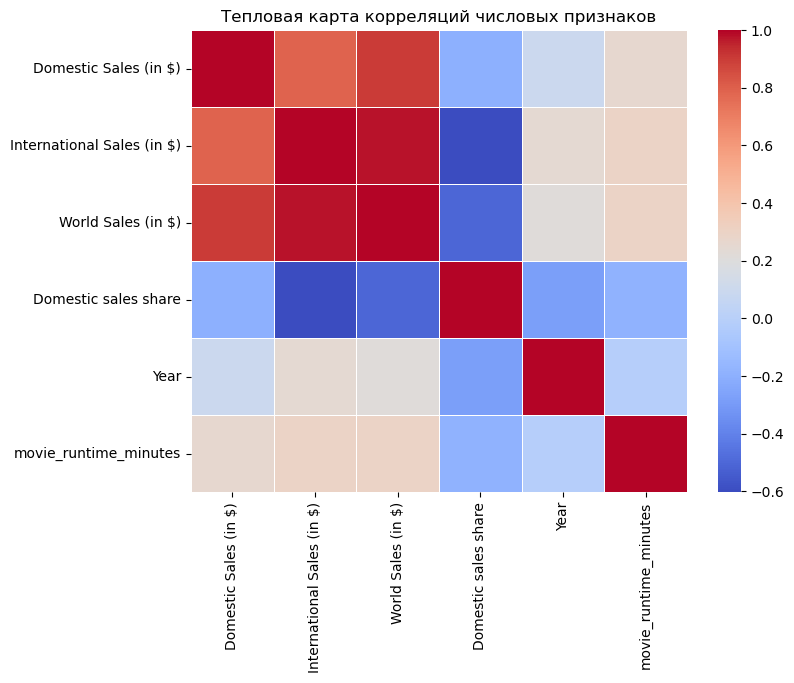

In [29]:
plt.figure
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
)
plt.title("Тепловая карта корреляций числовых признаков", fontsize=12)

plt.show()

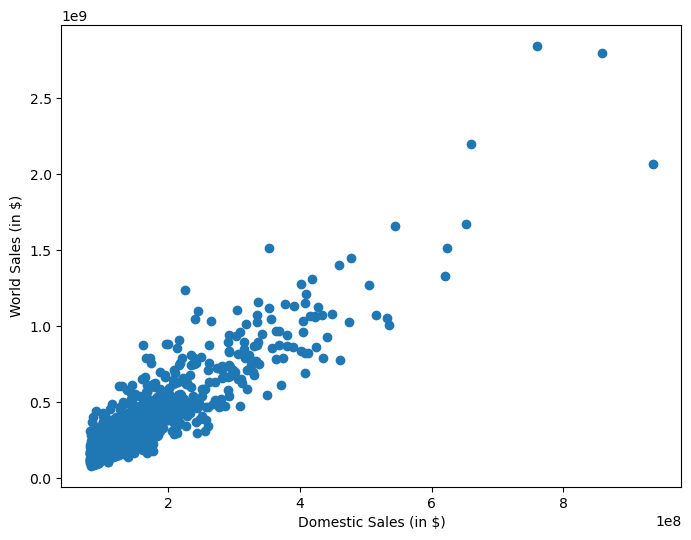

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x = df["Domestic Sales (in $)"], y = df["World Sales (in $)"])
plt.xlabel("Domestic Sales (in $)")
plt.ylabel("World Sales (in $)")
plt.show()

In [31]:
df.to_excel("Обработанные данные.xlsx", index=False)